<a href="https://colab.research.google.com/github/fediltf/Predictive_Modeling_for_Pricing_in_Real_Estate_Market/blob/main/Predictive_Modeling_for_Pricing_in_Real_Estate_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

In [ ]:
#Import Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading Dataset
data = pd.read_csv("/content/drive/MyDrive/melb_data.csv")

In [ ]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
data.shape

(13580, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


### Handling Missing Values

In [ ]:
#the percentage of missing values in each column
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
X = data.drop("Price", axis=1)  # Drop the "Price" column from the features
y = data["Price"]  # Use the "Price" column as the target
dX = pd.DataFrame(X)
dy = pd.DataFrame(y)

In [ ]:
from datetime import date
date.today().year
dX['House_Age']=date.today().year-dX['YearBuilt']
dX = dX.drop(columns=["YearBuilt"], axis=1)
dX.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,House_Age
0,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,NaN
1,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,123.0
2,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,123.0
3,Abbotsford,40 Federation La,3,h,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,NaN
4,Abbotsford,55a Park St,4,h,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,9.0


In [ ]:
from datetime import datetime
def calculate_difference(row):
    if pd.isnull(row['Date']):
        return np.nan
    else:
        return (datetime.now() - datetime.strptime(row['Date'], '%d/%m/%Y')).days
dX['Since_Sold'] = dX.apply(calculate_difference, axis=1)
dX = dX.drop(columns=["Date"], axis=1)
dX.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,House_Age,Since_Sold
0,Abbotsford,85 Turner St,2,h,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,NaN,2543
1,Abbotsford,25 Bloomburg St,2,h,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,123.0,2846
2,Abbotsford,5 Charles St,3,h,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,123.0,2452
3,Abbotsford,40 Federation La,3,h,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,NaN,2452
4,Abbotsford,55a Park St,4,h,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,9.0,2725


## Categorical Features

h    9449
u    3017
t    1114
Name: Type, dtype: int64


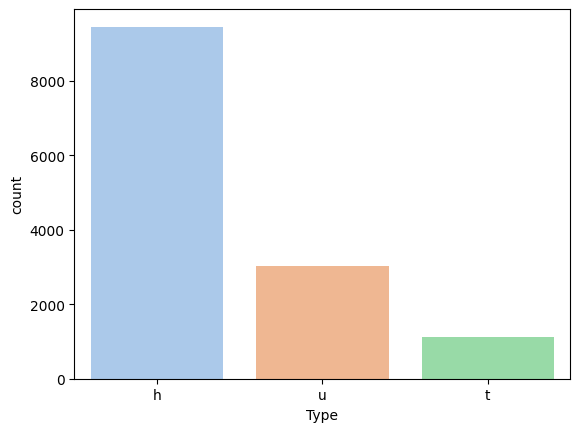

**h - house,cottage,villa, semi,terrace;
**u - unit, duplex;
**t - townhouse.


In [ ]:
print(dX.Type.value_counts())
sns.countplot(x="Type", data=dX, palette="pastel")
plt.show()
print("**h - house,cottage,villa, semi,terrace;\n**u - unit, duplex;\n**t - townhouse.")

S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: Method, dtype: int64


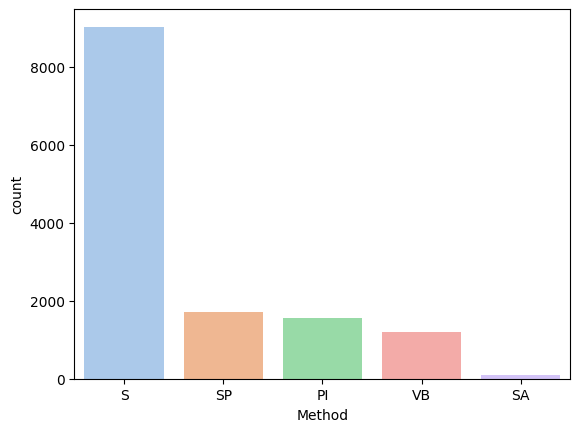

**S - property sold;
**SP - property sold prior;
**PI - property passed in;
**VB - vendor bid;
**SA - sold after auction;


In [ ]:
print(dX.Method.value_counts())
sns.countplot(x="Method", data=dX, palette="pastel")
plt.show()
print("**S - property sold;\n**SP - property sold prior;\n**PI - property passed in;\n**VB - vendor bid;\n**SA - sold after auction;")

Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: Regionname, dtype: int64


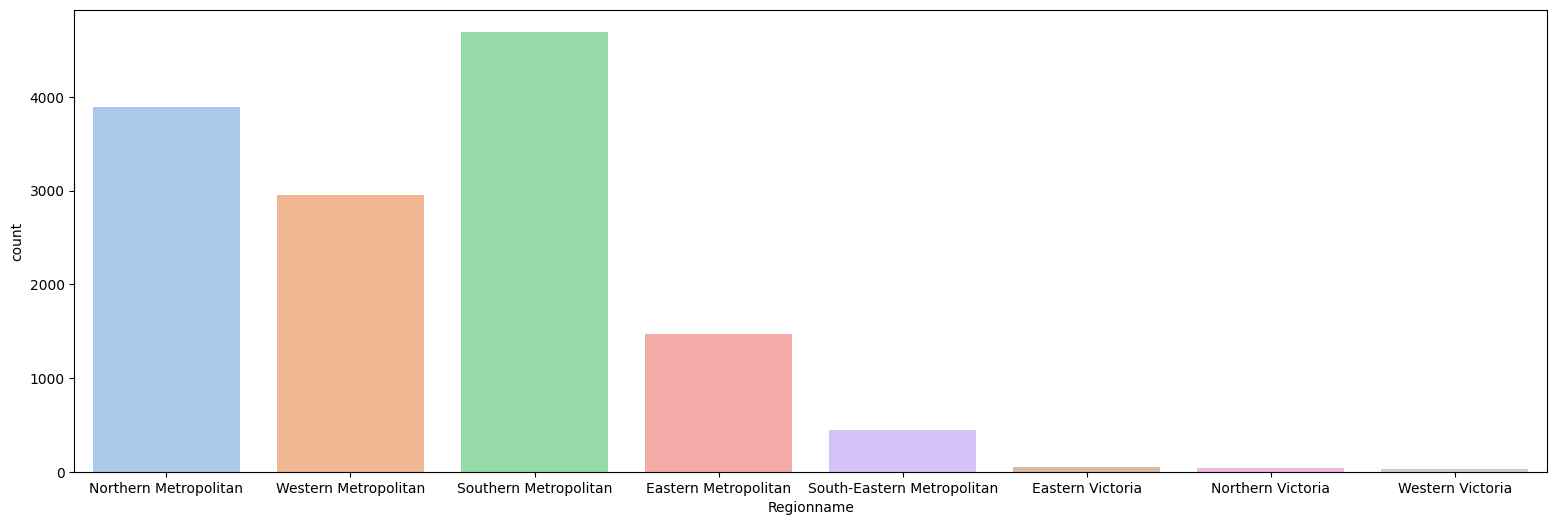

In [ ]:
print(dX.Regionname.value_counts())
plt.figure(figsize=(19, 6))
sns.countplot(x="Regionname", data=dX, palette="pastel")
plt.show()

In [ ]:
# dX = dX.drop(columns=categorical_features, axis=1)
# dX= pd.concat([dX, encoded_df], axis=1)
# dX.head()

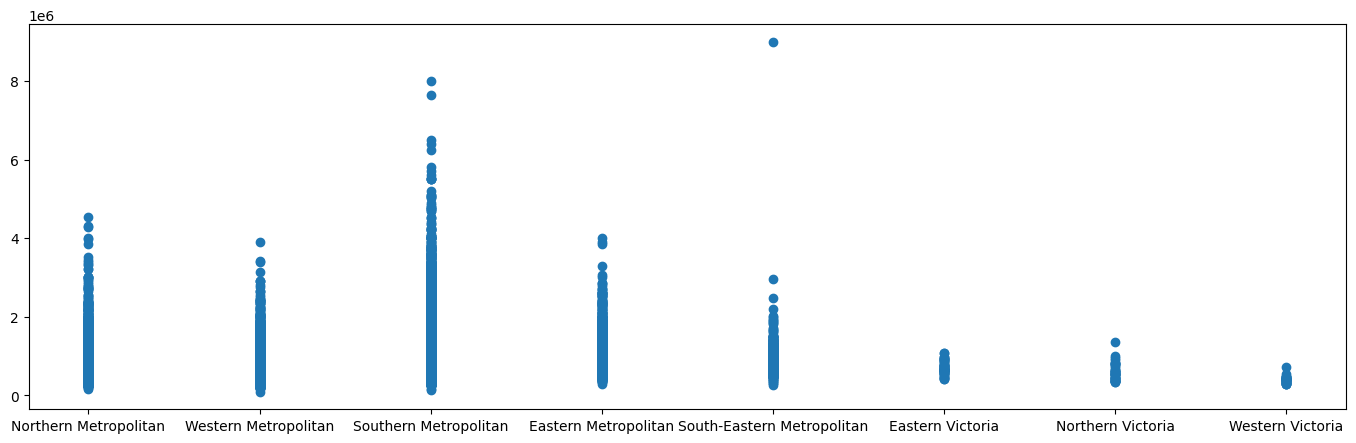

In [ ]:
plt.figure(figsize=(17, 5))
plt.scatter(dX["Regionname"], dy)
plt.show()

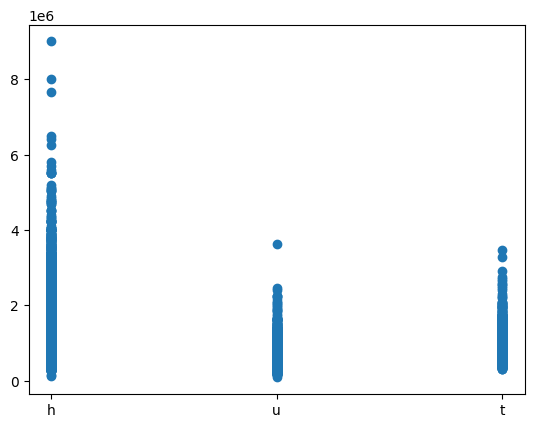

In [ ]:
plt.scatter(dX["Type"], dy)
plt.show()

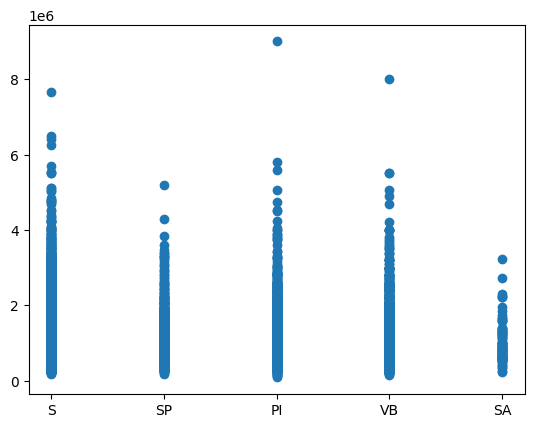

In [ ]:
plt.scatter(dX["Method"], dy)
plt.show()

In [ ]:
#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

categorical_features = ["Type", "Method", "Regionname"]

# OneHotEncoder Initialization (Drop Multicollinearity)
encoder = OneHotEncoder(sparse=False, drop="first")

# Fit and transform the encoder on the categorical features
encoded_features = encoder.fit_transform(data[categorical_features])

# Get the feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_features)

# Create a DataFrame with the one-hot encoded features and feature names
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

encoded_df.head()

,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dX = dX.drop(columns=categorical_features, axis=1)
dX= pd.concat([dX, encoded_df], axis=1)
dX.head()

,Suburb,Address,Rooms,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,...,Method_SA,Method_SP,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,Abbotsford,85 Turner St,2,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Abbotsford,25 Bloomburg St,2,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Abbotsford,5 Charles St,3,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Abbotsford,40 Federation La,3,Biggin,2.5,3067.0,3.0,2.0,1.0,94.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Abbotsford,55a Park St,4,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Numerical features

Rooms
Skew : 0.38


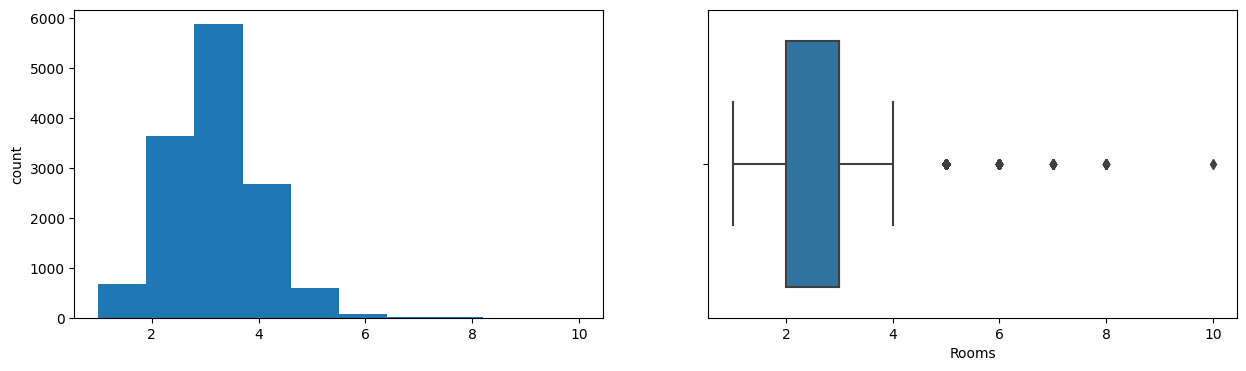

Distance
Skew : 1.68


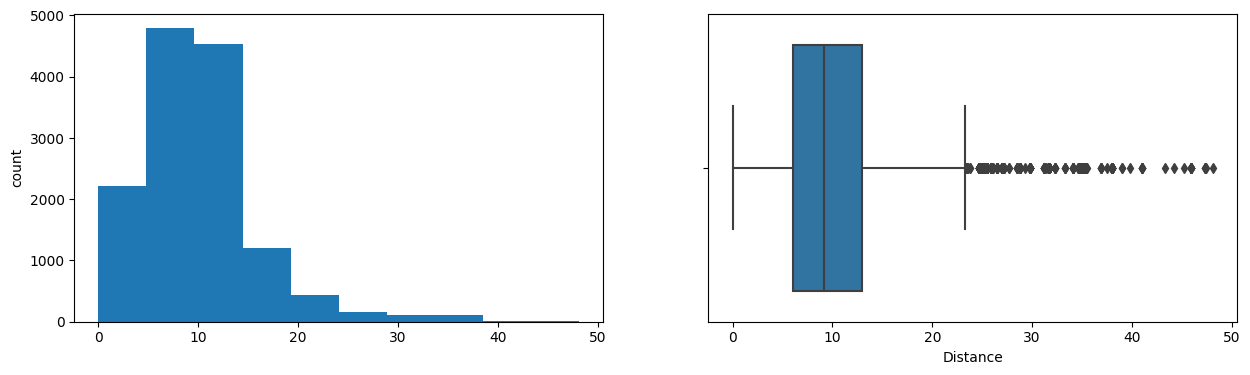

Bathroom
Skew : 1.38


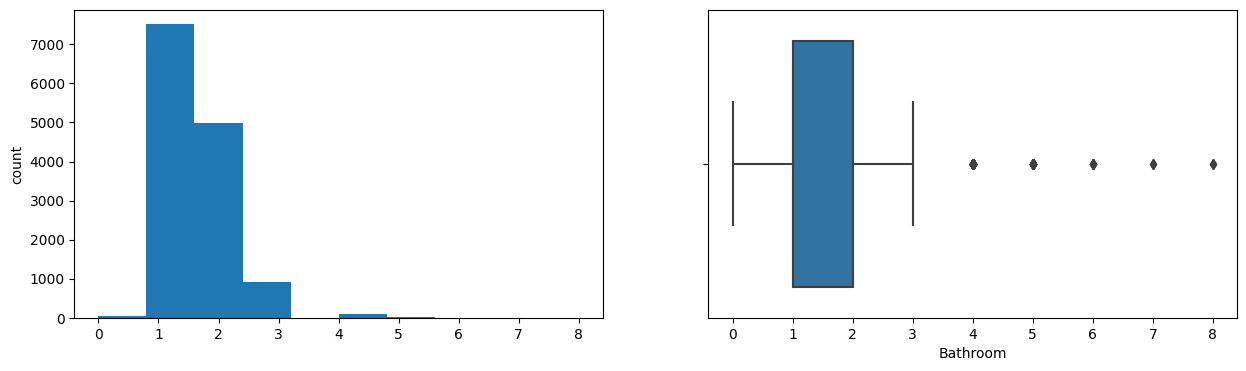

Car
Skew : 1.37


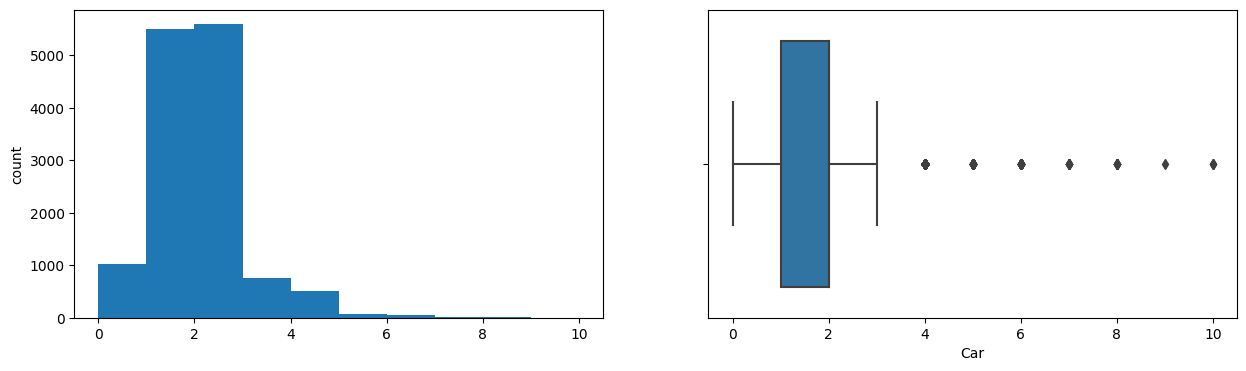

Landsize
Skew : 95.24


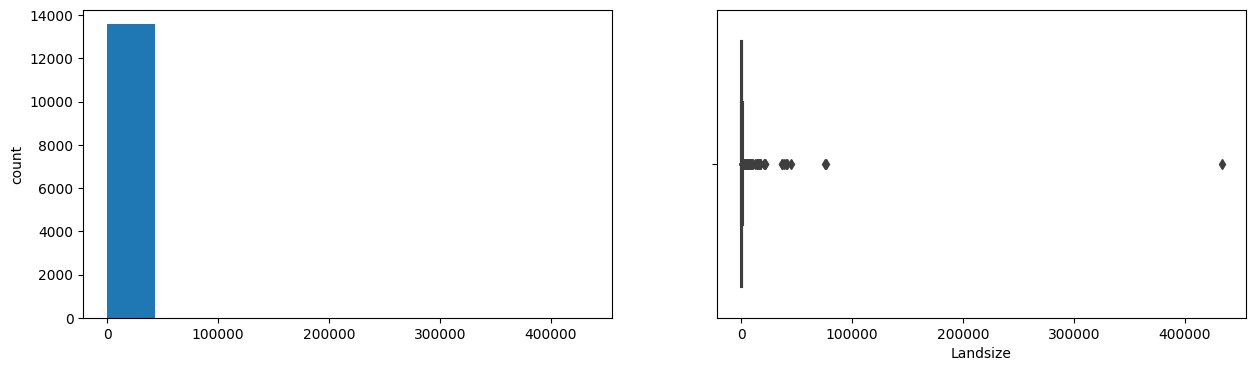

BuildingArea
Skew : 77.69


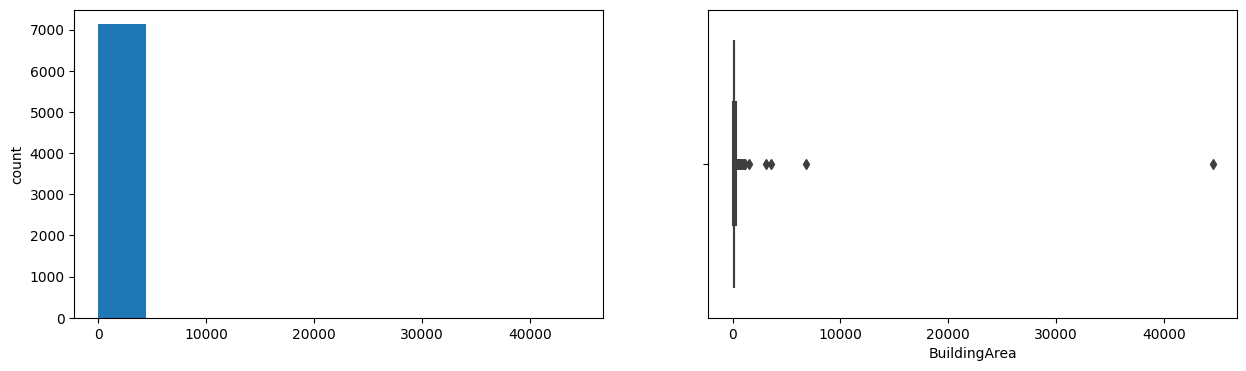

Lattitude
Skew : -0.43


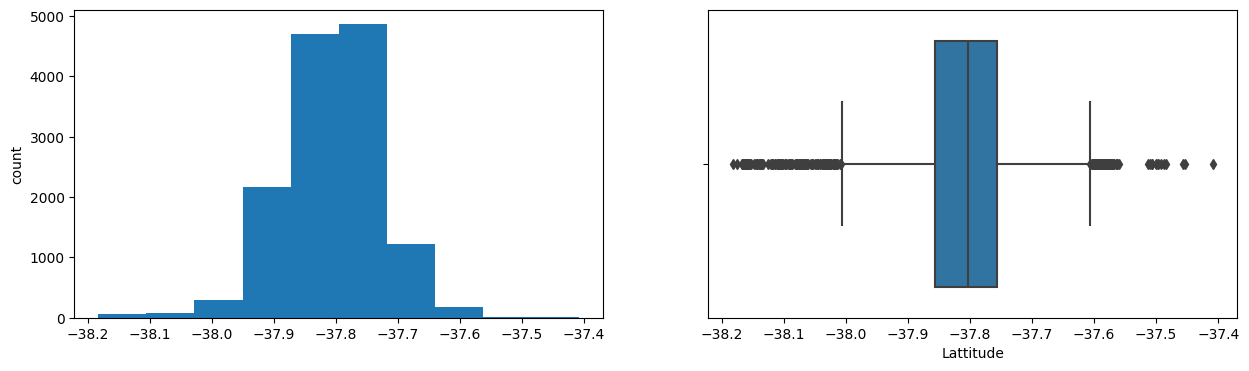

Longtitude
Skew : -0.21


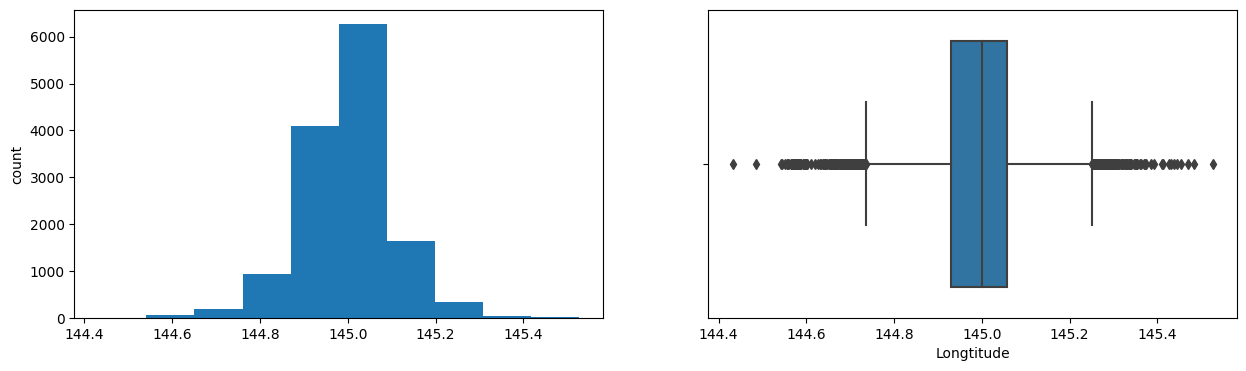

Propertycount
Skew : 1.07


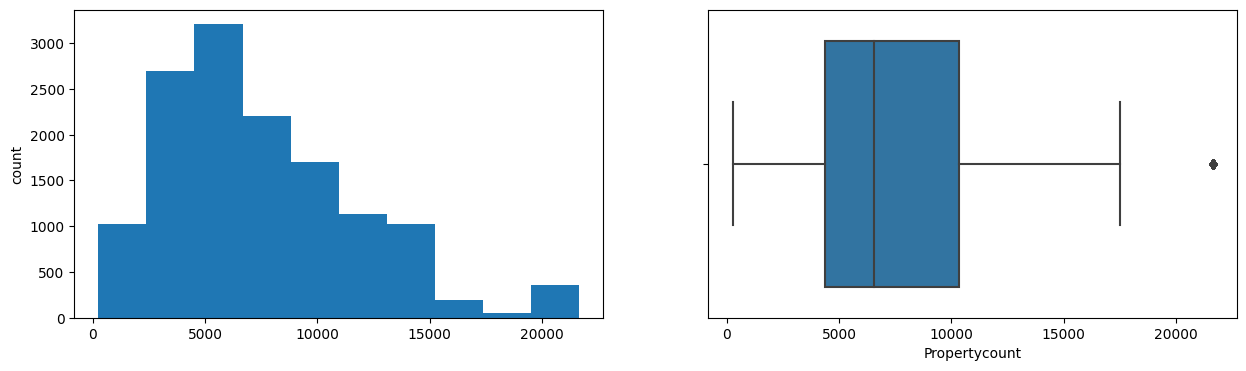

House_Age
Skew : 1.54


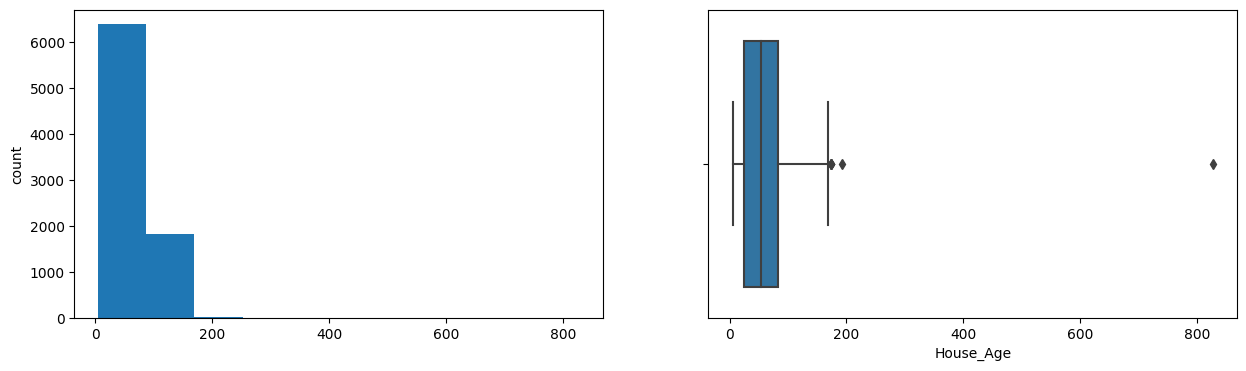

Since_Sold
Skew : 0.21


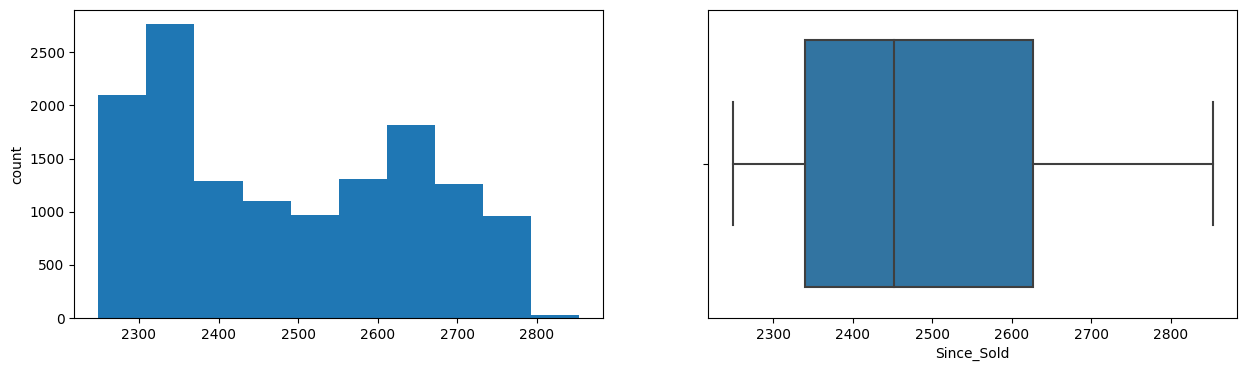

In [ ]:
numerical_features = ["Rooms",	"Distance",	"Bathroom", "Car", "Landsize", "BuildingArea", "Lattitude",	"Longtitude", "Propertycount",	"House_Age",	"Since_Sold"]
for col in numerical_features:
    print(col)
    print('Skew :', round(dX[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    dX[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dX[col])
    plt.show()

In [ ]:
dX[numerical_features].corr()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,House_Age,Since_Sold
Rooms,1.000000,0.294203,0.592934,0.408483,0.025678,0.124127,0.015948,0.100771,-0.081530,0.065413,-0.120298
Distance,0.294203,1.000000,0.127155,0.262994,0.025004,0.099481,-0.130723,0.239425,-0.054910,-0.246379,-0.294782
Bathroom,0.592934,0.127155,1.000000,0.322246,0.037130,0.111933,-0.070594,0.118971,-0.052201,-0.152702,-0.059483
Car,0.408483,0.262994,0.322246,1.000000,0.026770,0.096101,-0.001963,0.063395,-0.024295,-0.104515,-0.107857
Landsize,0.025678,0.025004,0.037130,0.026770,1.000000,0.500485,0.009695,0.010833,-0.006854,-0.036451,-0.031611
BuildingArea,0.124127,0.099481,0.111933,0.096101,0.500485,1.000000,0.043420,-0.023810,-0.028840,-0.019665,-0.022572
Lattitude,0.015948,-0.130723,-0.070594,-0.001963,0.009695,0.043420,1.000000,-0.357634,0.047086,-0.060445,0.004414
Longtitude,0.100771,0.239425,0.118971,0.063395,0.010833,-0.023810,-0.357634,1.000000,0.065988,0.003470,-0.089520
Propertycount,-0.081530,-0.054910,-0.052201,-0.024295,-0.006854,-0.028840,0.047086,0.065988,1.000000,-0.006361,-0.000211
House_Age,0.065413,-0.246379,-0.152702,-0.104515,-0.036451,-0.019665,-0.060445,0.003470,-0.006361,1.000000,0.108589


<Axes: >

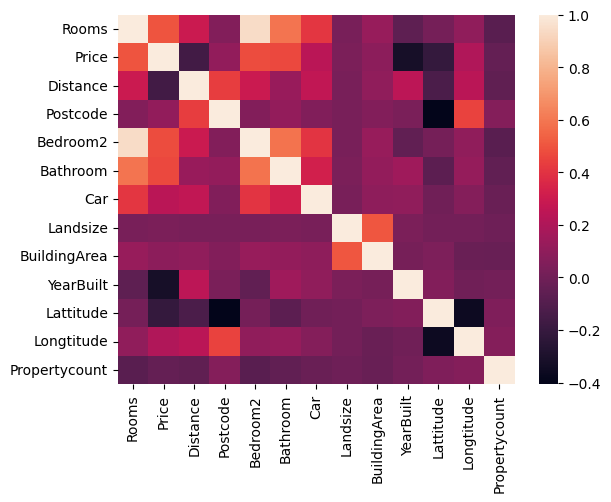

In [ ]:
#Correlation plot
sns.heatmap(data.corr())